# MLR to determine variables that affect Bike rental bookings

In [303]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 1 Load the data

In [304]:
bookings=pd.read_csv("/Users/gokul.gs1/Downloads/MILA/Jupyter Practice Notebooks and CSV/day.csv")

In [305]:
#previewing the data
bookings.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [306]:
#dropping the variable instant
bookings.drop("instant",axis=1,inplace=True)

In [307]:
bookings.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2 Understanding the basic data

In [308]:
#understanding the shape of the dataframe
bookings.shape

(730, 15)

In [309]:
# understanding the object type of each column
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [310]:
#summary statistics
bookings.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

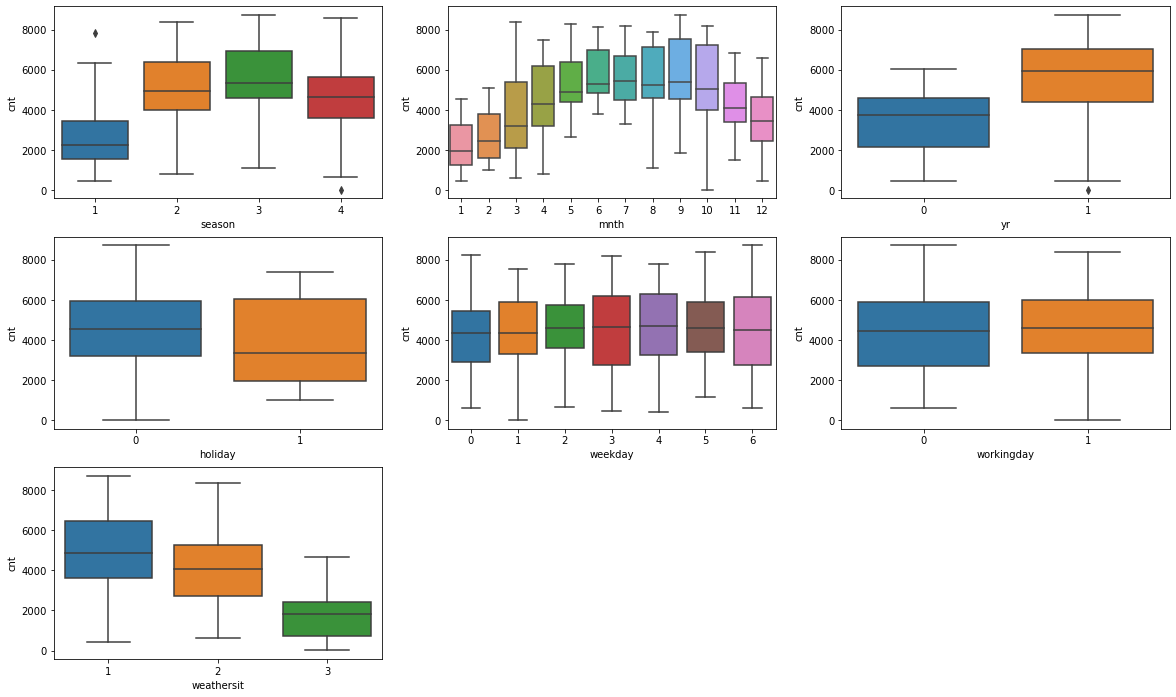

In [311]:
#understanding spread across categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bookings)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bookings)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bookings)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bookings)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bookings)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bookings)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bookings)

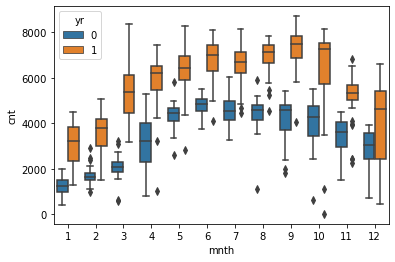

In [312]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bookings,hue="yr")
plt.show()

### Observation - We can see that there are not many outliers in the data set
- Bookings peak in the order of Seasons 3,2,4,1 (Fall, Summer, Winter and Spring)
- Months 6 to 9 (June - Sep) have higher bookings and Jan & Feb have lower bookings
- There is not much difference in day wise bookings 
- Higher bookings in clear weather conditions and drops as weather worsens
- Fewer bookings on Holidays compared to non Holidays
- 2019 had higher bookings than 2018. showing annual increase in Bike sharing behaviour irrespective of month or season etc

### 3 Preparing the data

In [313]:
#creating dummy variables for seasons
bookings_1 = pd.get_dummies(bookings,columns=['season'],drop_first=True)


In [314]:
#creating dummy variables for weather types
bookings_1 = pd.get_dummies(bookings_1,columns=['weathersit'],drop_first=True)

In [315]:
# dropping date column
bookings_1=bookings_1.drop("dteday",axis=1)

In [316]:
# dropping casual bookings field
bookings_1=bookings_1.drop("casual",axis=1)

In [317]:
# dropping registered bookings field
bookings_1=bookings_1.drop("registered",axis=1)

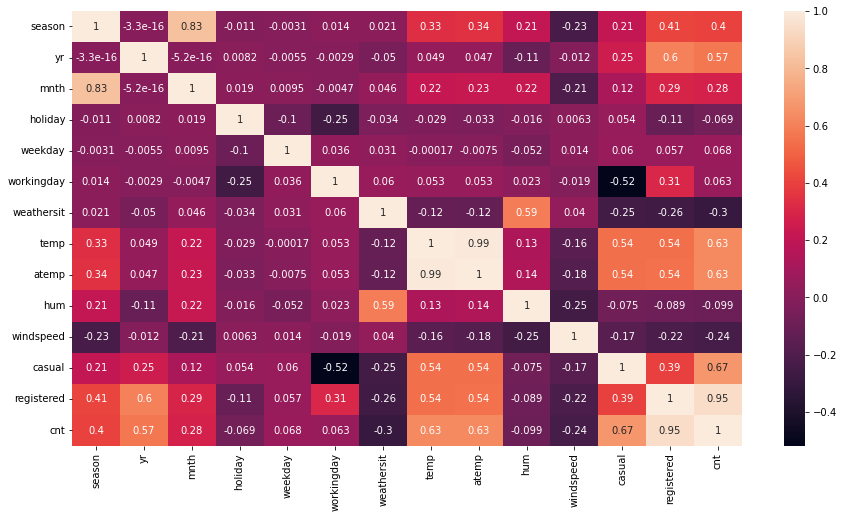

In [318]:
# understanding correlation between varaibles
plt.figure(figsize=(15,8))
sns.heatmap(bookings.corr(),annot=True)
plt.show()

In [319]:
# dropping atemp field as it has high correlation with temp field
bookings_1=bookings_1.drop("atemp",axis=1)

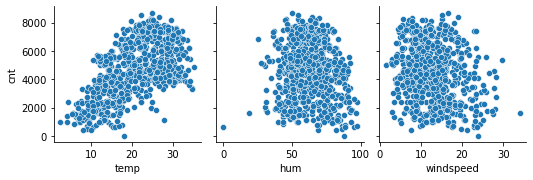

In [320]:
# correlation of temperature, humidity and windspeed with bike rental bookings
sns.pairplot(data=bookings_1,x_vars=["temp","hum","windspeed"],y_vars="cnt")
plt.show()

In [321]:
bookings_1.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


### 4 Building the model

In [322]:
#importing stats libraries and methods for training & testing
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [323]:
# splitting the data into train & test set

bookings_1_train,bookings_1_test=train_test_split(bookings_1,train_size=0.7,random_state=100)

In [324]:
#4 Scaling the data using Normalization
print(bookings_1_train.shape)

(510, 14)


In [325]:
from sklearn.preprocessing import MinMaxScaler

In [326]:
#4.1 instantiate a scaler object
scaler=MinMaxScaler()

In [327]:
#create a numerical variable list
num_vars=["temp","hum","windspeed","cnt","mnth","weekday"]

In [328]:
#4.2 fit the scaler
bookings_1_train[num_vars]=scaler.fit_transform(bookings_1_train[num_vars])

In [329]:
bookings_1_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1,0.545455,0,0.333333,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0
111,0,0.272727,0,0.833333,1,0.345824,0.751824,0.380981,0.191095,1,0,0,1,0


In [330]:
#correlation with cnt tells us temp variable has maximum correlation
#this can be used if we build a model with variables one by one
#However, since we have too many variables, 
#we will use RFE to start with optimum no. of variables


In [331]:
# creating the training set
y_train=bookings_1_train.pop("cnt")
X_train=bookings_1_train

In [332]:
# Linear Regression using scikit learn package
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE

In [333]:
#create an object of LR
lm=LinearRegression()

In [334]:
#fit the model 
lm.fit(X_train,y_train)
# use 10 as the initial no. of key features for model
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [335]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [336]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [337]:
#building training set with only the RFE suggested columns
X_train_rfe=X_train[col]

In [338]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [339]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [340]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          8.27e-183
Time:                        23:11:38   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2183      0.028      7.804   

#### Interpreting the model summary
-R2 of 0.827 implies the model is a good fit with all the variables considered explain 82% of changes in target variable
<br>-Low P(F statistic) signifies that all the features involved are statistically significant
<br>-Durbin Watson value of ~ 2 indicates no auto correlation between the variables.

In [341]:
# understanding multi collienarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,44.86
7,season_3,4.78
3,temp,3.50
6,season_2,2.55
4,hum,1.87
8,season_4,1.86
9,weathersit_2,1.56
10,weathersit_3,1.24
5,windspeed,1.19
1,yr,1.03


#### Ignore the high VIF for the constant as it is not a predictor

### 5 Residual analysis on training set


In [342]:
#residual analysis on training set
#error = f(y_train,y_train_pred)

#create predicted values on y_train
y_train_pred=lm.predict(X_train_rfe)
#create a variable for residuals
residuals=y_train-y_train_pred

In [343]:
residuals

576    0.049871
426   -0.014303
728   -0.175163
482   -0.122739
111   -0.089196
         ...   
578    0.010193
53    -0.019151
350    0.021630
79    -0.073442
520    0.144989
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

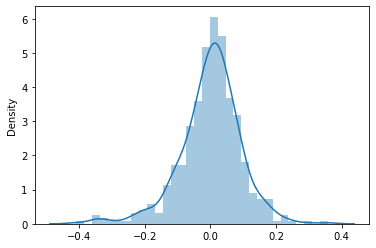

In [344]:
#plot the residuals

sns.distplot(residuals)

In [345]:
residuals.shape

(510,)

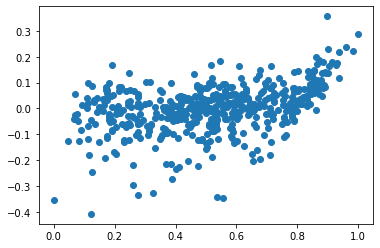

In [346]:
#check if residuals are independent - no pattern
plt.scatter(y_train,residuals)
plt.show()

### 6 Prediction and evaluation of the test set (y_test_predict)





In [347]:
#transform the test set
num_vars=["temp","hum","windspeed","cnt","mnth","weekday"]
bookings_1_test[num_vars]=scaler.fit_transform(bookings_1_test[num_vars])
bookings_1_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
184,0,0.545455,1,0.166667,0,0.837241,0.534223,0.149393,0.704300,0,1,0,1,0
535,1,0.454545,0,0.500000,1,0.911423,0.470417,0.231142,0.725421,1,0,0,0,0
299,0,0.818182,0,0.666667,1,0.496221,0.777843,0.443398,0.278853,0,0,1,1,0
221,0,0.636364,0,0.500000,1,0.890387,0.236659,0.449707,0.545512,0,1,0,0,0
152,0,0.454545,0,0.666667,1,0.821739,0.070765,0.682387,0.569148,1,0,0,0,0


In [348]:
y_test=bookings_1_test.pop("cnt")
X_test=bookings_1_test

In [349]:
X_train_rfe=X_train_rfe.drop("const",axis=1)

#### 6.1 Prediction

In [350]:
# Using the model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [351]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### 6.2 Evaluation

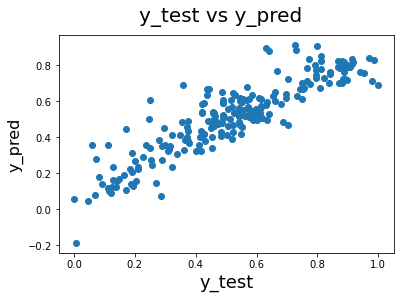

In [352]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [353]:
#R- squared score of test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8022038553700823

## Final equation of the best fit line

_cnt = 0.2183+0.2307(yr)+0.4960(temp)-0.0860(holiday)-0.1406(hum)-0.1830(windspeed)<br>+0.1180(season_2)+0.0749(season_3)+0.1620(season_4)-0.0522(weathersit_2)-0.2396(weathersit_3)_

**total_bookings = 0.2183+0.2307(year)+0.4960(temperature)-0.0860(holiday)-0.1406(humidity)-0.1830(windspeed)<br>+0.1180(summer_flag)+0.0749(fall_flag)+0.1620(winter_flag)-0.0522(mist_flag)-0.2396(light snow or light_rain)**

The top 3 variables that impact bike rental bookings are 
1. Temperature (change of 1 unit increases bookings by 0.4960 units)
2. Light Snow or Light Rain (Weathersit=3) (if there is light snow the bookings drop by 0.2396 units)
3. Year (increase in bookings by 0.2307 units in 2019 vs 2018)

In [354]:
############################################

#### (additional exercise) Equation of the best fit line through standardized scaling


total_bookings = -0.7973+1.0290(year)+0.4992(temperature)-0.3835(holiday)-0.0914(humidity)-0.1384(windspeed)<br>+0.5264(summer_flag)+0.3339(fall_flag)+0.7224(winter_flag)-0.2328(mist_flag)-1.0687(light snow or light_rain)